# Code Sandbox

A place to test new code and functions

In [1]:
# import packages and set working directory
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from math import exp
#os.chdir('../maize-Toff')

# import objects
from farm import Climate
from farm import Soil
from farm import Crop
from farm import CropModel
from farm.functions import make_climate_parameters, average_soil_moisture

In [2]:
climate = Climate()

soil = Soil(texture='loam')
crop = Crop(soil=soil, lgp=180)
soil.set_nZr(crop)

model = CropModel(crop=crop, climate=climate, soil=soil)
model.run()
model.output() # This is the correct length

,kc,LAI,stress,R,s,E,ET,T,L,dsdt,dos,doy
0,0.300000,0.750000,1.000000,0.000000,0.300000,0.099097,0.099097,0.000000,0.0,-0.099097,0.0,79
1,0.300000,0.750000,1.000000,7.458387,0.299561,0.098010,0.098010,0.000000,0.0,7.360377,0.0,80
2,0.300000,0.750000,0.985852,0.000000,0.332201,0.188771,0.197290,0.008519,0.0,-0.197290,0.0,81
3,0.300000,0.750000,0.991464,0.000000,0.331326,0.186090,0.191223,0.005133,0.0,-0.191223,0.0,82
4,0.300000,0.750000,0.996919,0.000000,0.330478,0.183504,0.185354,0.001850,0.0,-0.185354,0.0,83
5,0.300000,0.750000,1.000000,0.000000,0.329656,0.181009,0.181009,0.000000,0.0,-0.181009,0.0,84
6,0.300000,0.750000,1.000000,11.491257,0.328853,0.178584,0.178584,0.000000,0.0,11.312673,0.0,85
7,0.300000,0.750000,0.708745,0.000000,0.379020,0.349502,0.539258,0.189756,0.0,-0.539258,0.0,86
8,0.300000,0.750000,0.721793,2.781492,0.376629,0.340523,0.521022,0.180499,0.0,2.260470,0.0,87
9,0.300000,0.750000,0.667894,0.000000,0.386653,0.378678,0.597980,0.219303,0.0,-0.597980,0.0,88


In [3]:
planting_date = 100
s0_mean, s0_std = average_soil_moisture(model, n_sims=500, doy=planting_date)
output = model.run(s0=s0_mean, planting_date=planting_date, do_output=True)
output # This just returns the length of average soil moisture calculation

,kc,LAI,stress,R,s,E,ET,T,L,dsdt,dos,doy
0,0.3,0.75,0.196639,0.000000,0.502534,0.907006,1.574879,0.667873,0.0,-1.574879,0.0,79
1,0.3,0.75,0.217126,7.458387,0.495550,0.871056,1.511894,0.640838,0.0,5.946493,0.0,80
2,0.3,0.75,0.145087,0.000000,0.521920,1.009303,1.752219,0.742916,0.0,-1.752219,0.0,81
3,0.3,0.75,0.164811,0.000000,0.514150,0.967864,1.680701,0.712838,0.0,-1.680701,0.0,82
4,0.3,0.75,0.184910,0.000000,0.506696,0.928664,1.612650,0.683986,0.0,-1.612650,0.0,83
5,0.3,0.75,0.205282,0.000000,0.499545,0.891562,1.547866,0.656303,0.0,-1.547866,0.0,84
6,0.3,0.75,0.225837,11.491257,0.492681,0.856429,1.486161,0.629733,0.0,10.005096,0.0,85
7,0.3,0.75,0.110290,0.000000,0.537049,1.091630,1.893112,0.801482,0.0,-1.893112,0.0,86
8,0.3,0.75,0.129010,2.781492,0.528654,1.045681,1.814666,0.768984,0.0,0.966827,0.0,87
9,0.3,0.75,0.119266,0.000000,0.532942,1.069066,1.854646,0.785581,0.0,-1.854646,0.0,88


In [ ]:
average_soil_moisture(model, n_sims=1000, doy=90)

In [ ]:
output

start = t_start
end = t_start + lgp

output.iloc[start:end].plot(y='s')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11318ab38>]],
      dtype=object)

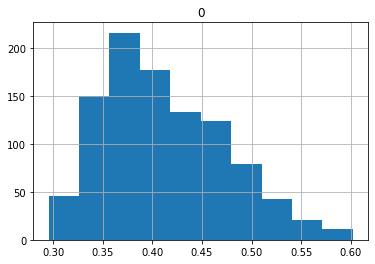

In [7]:
n_sim = 1000
models = [CropModel(crop=crop, climate=Climate(), soil=soil) for i in np.arange(n_sim)]

planting_date = 10

output = [model.run(do_output=True, planting_date=planting_date) for model in models]

s_avg = pd.DataFrame([o['s'].mean() for o in output])
s_avg.hist()

In [8]:
output

[     kc   LAI    stress          R         s         E        ET         T  \
 0   0.3  0.75  1.000000   0.000000  0.300000  0.099097  0.099097  0.000000   
 1   0.3  0.75  1.000000   0.000000  0.299561  0.098010  0.098010  0.000000   
 2   0.3  0.75  1.000000   1.387011  0.299126  0.096939  0.096939  0.000000   
 3   0.3  0.75  1.000000  10.443856  0.304847  0.111344  0.111344  0.000000   
 4   0.3  0.75  0.871107   0.000000  0.350667  0.248234  0.328237  0.080002   
 5   0.3  0.75  0.879894   0.000000  0.349212  0.243353  0.317721  0.074368   
 6   0.3  0.75  0.888442   3.178730  0.347803  0.238659  0.307573  0.068914   
 7   0.3  0.75  0.812701   0.000000  0.360535  0.282165  0.400366  0.118201   
 8   0.3  0.75  0.823060   0.000000  0.358760  0.275954  0.387282  0.111328   
 9   0.3  0.75  0.833143   3.918916  0.357042  0.269989  0.374669  0.104680   
 10  0.3  0.75  0.743158  37.069670  0.372760  0.326160  0.491681  0.165521   
 11  0.3  0.75  0.114794   0.000000  0.534968  1.080

In [ ]:
# Plot Time Series

def plot_ts(x, title, ylab):
    #d = np.arange(181)
    plt.plot(x, '-')
    plt.title(title)
    plt.xlabel('Time of Season, $\mathit{t}$')
    plt.ylabel(ylab)


# S and time
o = model.output()
plot_ts(o['s'], 'Relative soil moisture in model.output', 'Relative soil moisture, $\mathit{mm}$')